In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_columns=None
pd.options.mode.chained_assignment = None

In [2]:
after_logreg = pd.read_csv(r'C:\Users\User\triggers\after_logreg.csv', index_col = 0)

In [3]:
# triggers_actions = pd.read_csv(r'C:\Users\User\triggers\triggers_actions.csv',index_col = 0)

In [6]:
after_logreg['result'].value_counts()

result
 0    11028782
-1      110258
 1        3278
Name: count, dtype: int64

In [7]:
percentage_success = round(after_logreg[after_logreg['result'] == 1]['result'].count()/after_logreg[after_logreg['result'] == -1]['result'].count()*100,2)
print('процент успешных взаимодействий от общего количества взаимодействий', percentage_success )

процент успешных взаимодействий от общего количества взаимодействий 2.97


In [8]:
percentage_success_per_user = after_logreg[after_logreg['result'] == 1]['result'].count()/after_logreg['guid'].nunique()*100
print('процент успешных взаимодействий от общего количества пользователей за период', percentage_success_per_user )


процент успешных взаимодействий от общего количества пользователей за период 0.4198752926830518


In [9]:
after_logreg['succes_overall'] = after_logreg['interaction_prob']*after_logreg['success_prob']

In [10]:
after_logreg_success = after_logreg[after_logreg['result'] == 1]

In [11]:
after_logreg_success['interaction_prob'].describe()

count    3.278000e+03
mean     6.140069e-01
std      2.306037e-01
min      2.420353e-14
25%      3.641274e-01
50%      7.508987e-01
75%      7.972804e-01
max      9.783415e-01
Name: interaction_prob, dtype: float64

In [12]:
after_logreg_fail = after_logreg[after_logreg['result'] == -1]

In [17]:
after_logreg_success.head()

,guid,date,trigger,type,action_date,result,time_since_last_action,last_successful_type,triggers_since_last_action,interaction_prob,success_prob,succes_overall
Unnamed: 0,,,,,,,,,,,,
6662,018783be-25da-710a-36a7-2d50f5a61395,2024-05-03 12:40:29,103,1,1,1,0.000220,0.0,5,0.355821,0.483643,0.172090
7359,018783be-b7c8-5d48-9eaa-629bcd01d575,2024-05-11 09:02:15,1773,2,1,1,0.000000,0.0,1,0.780668,0.124108,0.096887
8573,018783bf-0c68-7d31-fe70-6199813488a1,2024-05-12 06:11:21,1835,2,1,1,10.978252,0.0,267,0.620815,0.219574,0.136315
11437,018783bf-fee2-0048-ea84-62e50fb17a64,2024-05-07 06:12:50,2065,2,1,1,5.997813,0.0,26,0.803135,0.110034,0.088373
14197,018783c1-a3e2-c205-b94c-80d0d87c8cc7,2024-05-18 08:04:09,1793,2,1,1,15.985093,0.0,5,0.861537,0.076161,0.065616


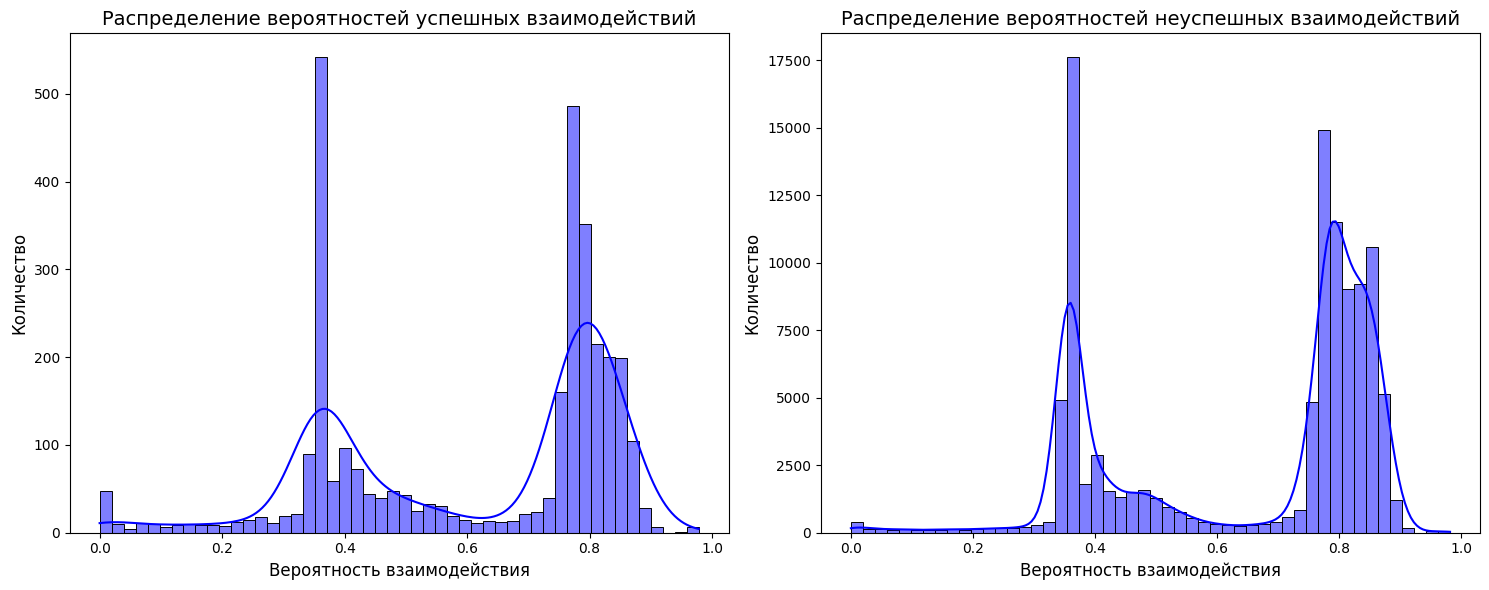

In [13]:
# создаем фигуру и две оси рядом
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# первый график - для успешных взаимодействий
sns.histplot(after_logreg_success['interaction_prob'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Распределение вероятностей успешных взаимодействий', fontsize=14)
axes[0].set_xlabel('Вероятность взаимодействия', fontsize=12)
axes[0].set_ylabel('Количество', fontsize=12)

# второй график - для неуспешных взаимодействий
sns.histplot(after_logreg_fail['interaction_prob'], bins=50, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Распределение вероятностей неуспешных взаимодействий', fontsize=14)
axes[1].set_xlabel('Вероятность взаимодействия', fontsize=12)
axes[1].set_ylabel('Количество', fontsize=12)

# отображаем оба графика
plt.tight_layout()
plt.show()

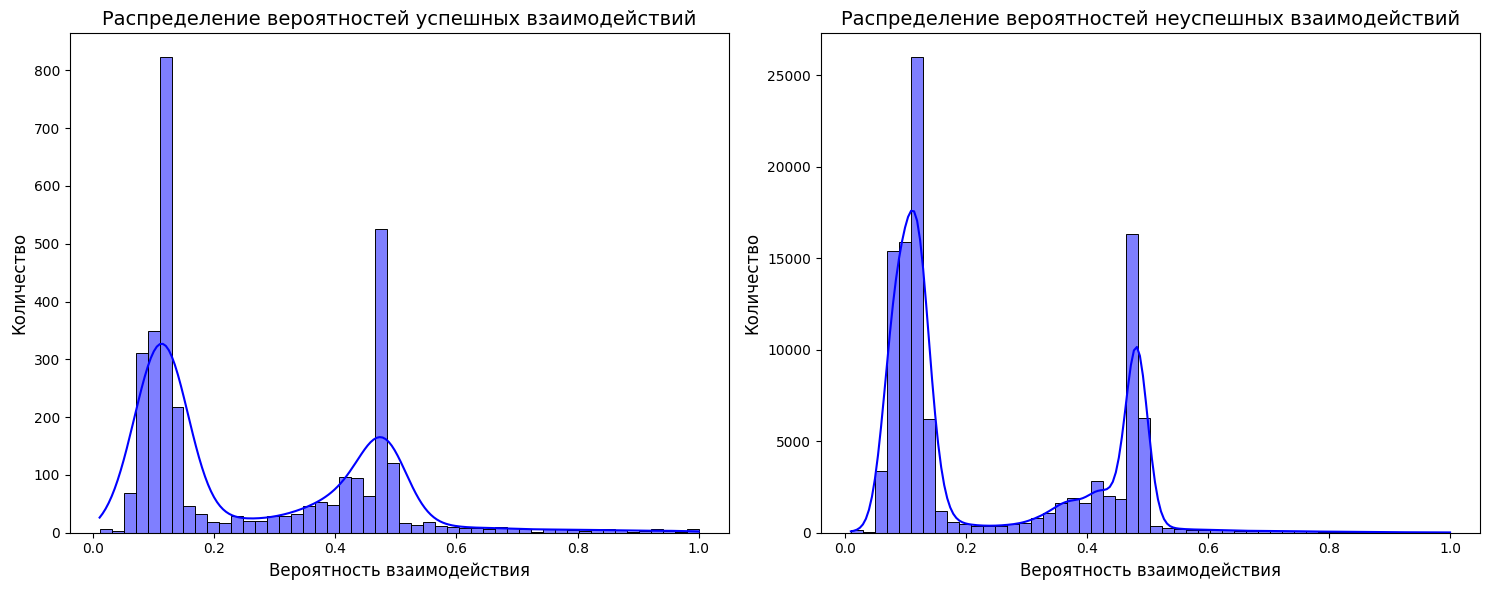

In [14]:
# создаем фигуру и две оси рядом
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# первый график - для успешных взаимодействий
sns.histplot(after_logreg_success['success_prob'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Распределение вероятностей успешных взаимодействий', fontsize=14)
axes[0].set_xlabel('Вероятность взаимодействия', fontsize=12)
axes[0].set_ylabel('Количество', fontsize=12)

# второй график - для неуспешных взаимодействий
sns.histplot(after_logreg_fail['success_prob'], bins=50, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Распределение вероятностей неуспешных взаимодействий', fontsize=14)
axes[1].set_xlabel('Вероятность взаимодействия', fontsize=12)
axes[1].set_ylabel('Количество', fontsize=12)

# отображаем оба графика
plt.tight_layout()
plt.show()

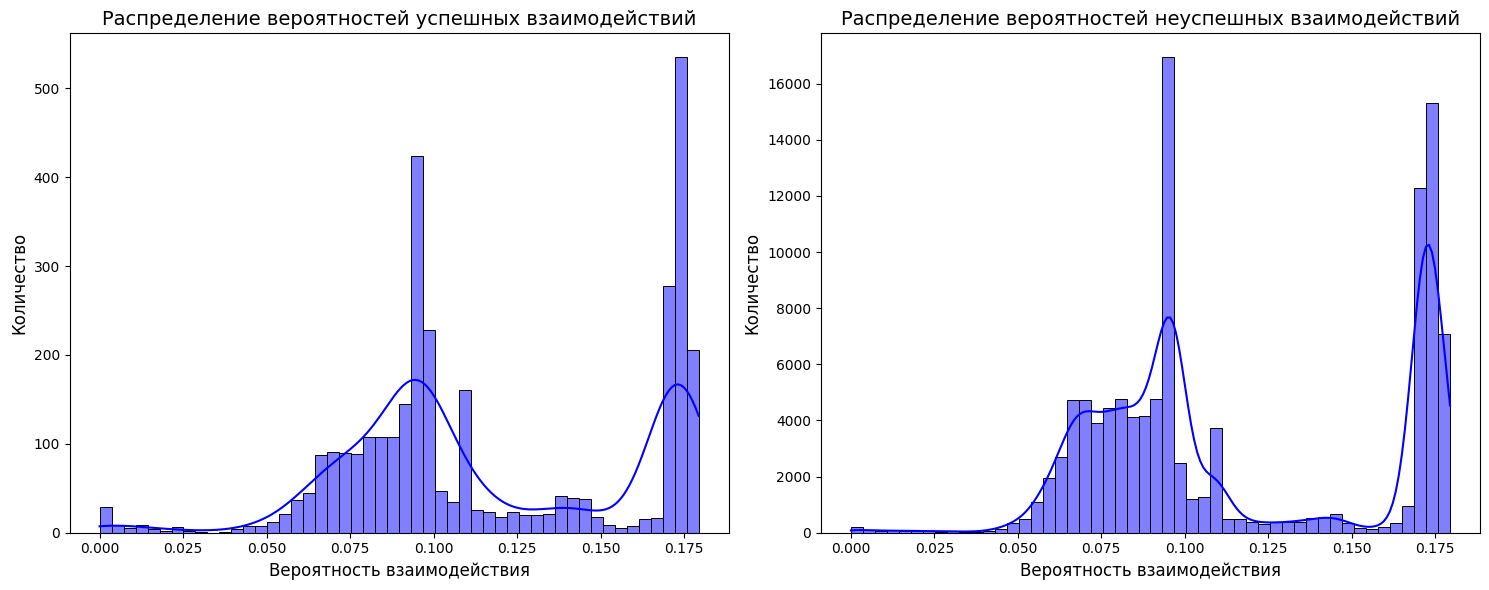

In [15]:
# создаем фигуру и две оси рядом
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# первый график - для успешных взаимодействий
sns.histplot(after_logreg_success['succes_overall'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Распределение вероятностей успешных взаимодействий', fontsize=14)
axes[0].set_xlabel('Вероятность взаимодействия', fontsize=12)
axes[0].set_ylabel('Количество', fontsize=12)

# второй график - для неуспешных взаимодействий
sns.histplot(after_logreg_fail['succes_overall'], bins=50, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Распределение вероятностей неуспешных взаимодействий', fontsize=14)
axes[1].set_xlabel('Вероятность взаимодействия', fontsize=12)
axes[1].set_ylabel('Количество', fontsize=12)

# отображаем оба графика
plt.tight_layout()
plt.show()

In [ ]:
after_logreg_success['succes_overall']

In [ ]:
after_logreg_success

In [26]:
after_logreg_choice = after_logreg[after_logreg['succes_overall'] >= 0.04]

In [ ]:
percentage_success_new = round(after_logreg_choice[after_logreg_choice['result'] == 1]['result'].count()/after_logreg_choice[after_logreg_choice['result'] == -1]['result'].count()*100,2)
print('процент успешных взаимодействий от общего количества взаимодействий', percentage_success_new)

In [ ]:
after_logreg_choice['result'].value_counts()

In [ ]:

percentage_success_per_user_new= after_logreg_choice[after_logreg_choice['result'] == 1]['result'].count()/after_logreg_choice['guid'].nunique()*100
print('процент успешных взаимодействий от общего количества пользователей за период', percentage_success_per_user_new)


In [ ]:
after_logreg_choice[after_logreg_choice['result'] == 1]['result'].count()

In [ ]:
after_logreg_choice['guid'].nunique()